<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> David Monsalves M. ; 201773547-3 ; Malla nueva </h4>
    <h4> Sebastián Soto T. ;  201773501-5 ; Malla nueva </h4>
</center>
<p>
<center><h4>Marzo 2019</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 5 de abril.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

**Puntos bonus para todos:** Debido a que a veces hay preguntas que les piden una conclusión utilizando ciertos elementos, si lo desea, puede agregar elementos extra para hacer una mejor conclusión o concluir algo más que tenga sentido con lo anterior; estos gráficos pueden otorgar puntos bonus dependiendo de su calidad y del comentario que lo acompañe (con un máximo de 3 puntos bonus por pregunta, no acumulables si alcanza la nota máxima)

## 1. Sarcasmo en Reddit (30p)

Reddit es una página web muy conocida que, en simples palabras, es una compilación de muchos foros llamados "subreddits", en esta sección trabajará con un dataset que contiene una compilación de comentarios realizados por usuarios en distintos subreddits, los que vienen con una indicación de si el comentario es sarcástico o no.
[Fuente](https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit)

>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset 

In [1]:
# Cargamos el set y leemos por cada fila.

import csv
n = 0
with open('reddit.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        if n < 6:
            print(row)
            n += 1

['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc', 'parent_comment']
['0', 'NC and NH.', 'Trumpbart', 'politics', '2', '-1', '-1', '2016-10', '2016-10-16 23:55:23', "Yeah, I get that argument. At this point, I'd prefer is she lived in NC as well."]
['0', 'You do know west teams play against west teams more than east teams right?', 'Shbshb906', 'nba', '-4', '-1', '-1', '2016-11', '2016-11-01 00:24:10', 'The blazers and Mavericks (The wests 5 and 6 seed) did not even carry a good enough record to make the playoffs in the east last year.']
['0', "They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1", 'Creepeth', 'nfl', '3', '3', '0', '2016-09', '2016-09-22 21:45:37', "They're favored to win."]
['0', 'This meme isn\'t funny none of the "new york nigga" ones are.', 'icebrotha', 'BlackPeopleTwitter', '-8', '-1', '-1', '2016-10', '2016-10-18 21:03:47', "deadass don't kill my buzz"]
['

> El dataset contiene datos, donde las columnas son: Etiqueta, comentario, autor, subreddit, puntaje, cantidad de me gustas, cantidad de no me gustas, fecha, horario y respuesta del comentario. Cada fila tiene el valor que corresponde a cada columna asociada.

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 


## CÓDIGO b):

In [2]:
dic_sub = dict()
cont_yr = dict()
n = 1

# Se lee y se cuenta la cantidad de comentarios sarcásticos y no sarcástico del subreddit que ha salido
# y se agrega a un diccionario dic_sub. Además se agrega al diccionario cont_yr la cantidad de comentarios sarcásticos
# y no sarcásticos según el año que aparece.

with open('reddit.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        if n != 1:
            if row[3] not in dic_sub.keys():
                dic_sub[row[3]] = [0,0]
            elif row[0] == '0' :
                dic_sub[row[3]][0] += 1
            else:
                dic_sub[row[3]][1] += 1
                
            year =int(row[8].split('-')[0])
            if year not in cont_yr.keys():
                cont_yr[year] = [0,0]
            elif row[0] == '0' :
                cont_yr[year][0] += 1
            else:
                cont_yr[year][1] += 1
        n = 2
# Se filtra subreddits que contengan mas de 1000 comentarios     
sub_reddits = list()
for subr in dic_sub.items():
    filtro = subr[1][0] + subr[1][1]
    if filtro > 1000:
        sub_reddits.append(subr)

#se separa los subreddits con comentarios sarcásticos y no sarcásticos en las dos listas siguientes.
# las listas contiene tuplas con (probabilidad,subreddit,cant_no_sarcasticos,cant_sarcasticos,total)

sub_reddits_no_sarcas = list()
sub_reddits_sarcas = list()
for subr in sub_reddits:
    pns = subr[1][0]/(subr[1][0] + subr[1][1])
    ps = subr[1][1]/(subr[1][0] + subr[1][1])
    pns = round((pns*100),2)
    ps = round((ps*100),2)
    sub_reddits_no_sarcas.append((pns, subr[0],subr[1][0],subr[1][1],subr[1][0]+subr[1][1]))
    sub_reddits_sarcas.append((ps, subr[0],subr[1][0],subr[1][1],subr[1][0]+subr[1][1]))
# Se ordena de menor a mayor según la propabilidad
sub_reddits_no_sarcas.sort(reverse=True)
sub_reddits_sarcas.sort(reverse = True)

## RESPUESTA b):

In [3]:
print(sub_reddits_no_sarcas[0])
print(sub_reddits_sarcas[0])

(77.24, 'Games', 1035, 305, 1340)
(78.44, 'creepyPMs', 1178, 4287, 5465)


### Tabla de los datos:

Subreddit | Porcentaje | Comentarios No Sarcásticos | Comentarios Sarcásticos | Total Comentarios |
 --- | --- | --- | --- | --- |
**Games** | 77.24 | 1035 | 305 | 1340 |
**creepyPMs** | 78.44 | 1178 | 4287 | 5465 |

>Se puede observar que en el subreddit <b>Games</b> predominan los comentarios no sarcásticos, mientras que en <b>creepyPMs</b> predominan los sarcásticos.

>Se utilizó un filtro de los subreddits que tienen menos de 1000 comentarios en el archivo, para que exista una mejor comparación entre los porcentajes de ambos tipos de comentarios, pues en los subreddits que no tienen tantos comentarios, uno de ellos pesa mucho más que en los subreddits que tienen una gran cantidad de comentarios.

>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

## CÓDIGO c):

In [4]:
subr_ns = list()
subr_s = list()
for subr in dic_sub.items():
    subr_ns.append((subr[1][0], subr[0]))
    subr_s.append((subr[1][1], subr[0]))
subr_ns.sort(reverse = True)
subr_s.sort(reverse = True)

## RESPUESTA c) :

In [5]:
print("TOP 10 no_sarcastico")
n = 1
# Se escoge solo los primeros 10 subreddits de ambas listas
for ns in subr_ns[:10]:
    print(n , ". " , ns[1], " " , ns[0])
    n += 1
print("\n")
n = 1
print("TOP 10 sarcasticos")
for s in subr_s[:10]:
    print(n , ". " , s[1], " " , s[0])
    n += 1

TOP 10 no_sarcastico
1 .  AskReddit   39309
2 .  politics   15585
3 .  funny   9839
4 .  leagueoflegends   9627
5 .  worldnews   9428
6 .  pics   8328
7 .  pcmasterrace   8227
8 .  nfl   6934
9 .  news   6697
10 .  nba   6697


TOP 10 sarcasticos
1 .  AskReddit   26367
2 .  politics   23910
3 .  worldnews   16948
4 .  leagueoflegends   11409
5 .  pcmasterrace   10760
6 .  news   10193
7 .  funny   8099
8 .  pics   7825
9 .  todayilearned   7754
10 .  GlobalOffensive   7586


> Las listas son muy similares, existen 8 subreddits que pertenecen a ambas listas. Esto se puede deber a que estos subreddits tienen una gran cantidad de comentarios, por lo que se generan una mayor cantidad de comentarios, tanto sarcásticos como no sarcásticos

>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

*Consejo: puede agrupar comentarios y contar el total que se registra en ese momento del tiempo en vez de graficar cada comentario en la línea.*

## CÓDIGO d) :

In [6]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.8
sarcs = list()
no_sarcs = list()

# Se separa en sarcasticos y no sarcasticos en listas.

for item in cont_yr.values():
    no_sarcs.append(item[0])
    sarcs.append(item[1])
sarcs.reverse()
no_sarcs.reverse()

indices = list(cont_yr.keys())
indices.reverse()
for i in range(len(indices)):
    indices[i] = int(indices[i])

plt.bar(indices, sarcs, width=0.55, color='b', label='Sarcasticos')
plt.bar(indices, no_sarcs, width=0.4, color='r', alpha=0.7, label='No sarcasticos')

plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## RESPUESTA d) :

> En el gráfico, se puede observar que en cada año ha ido aumentando exponencialmente la cantidad de comentarios en Reddit. Además, la cantidad de comentarios sarcásticos y no sarcásticos han ido creciendo de manera casi pareja. A excepción del año 2016, en todos los años la cantidad de comentarios sarcásticos ha sido levemente mayor a la cantidad de comentarios no sarcásticos.

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, comparelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

## CÓDIGO e) :

In [7]:
import csv
import math
scores_ns = list()
scores_s = list()
a = 1
total_ns = 0
total_s = 0

# Se lee y se separan en listas los puntajes de comentarios sarcásticos de los no sarcásticos.

with open('reddit.csv', newline='') as File:  
    reader = csv.reader(File)
    for row in reader:
        if a != 1 and int(row[0]) == 0:
            scores_ns.append(int(row[4]))
            total_ns += 1
        elif a != 1 and int(row[0]) == 1:
            scores_s.append(int(row[4]))
            total_s += 1
        a = 2
scores_ns.sort()
scores_s.sort()

HISTOGRAMA 1 :


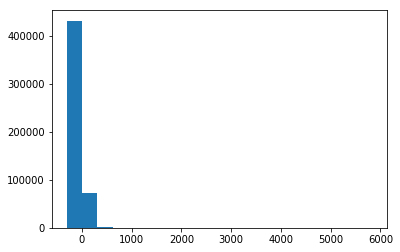

In [8]:
import matplotlib.pyplot as plt 
k = round(math.log(total_ns,2) + 1)
R = max(scores_ns) - min(scores_ns)
A = R/k
print("HISTOGRAMA 1 :")
plt.hist(scores_ns,bins = k, rwidth = A)
plt.show()

## Tabla de comentarios no sarcásticos según intervalos de puntajes:
Intervalo | Cantidad |
 --- | --- |
**[-289, 7.8]** | 431.226 |
**(7.8, 313.6]** | 73.016 |
**(313.6, 619.4]** | 669 |
**(619.4, 925.2]** | 221 |
**(925.2, 1231]** | 107 |
**(1231, 1536.8]** | 52 |
**(1536.8, 1842.6]** | 30 |
**(1842.6, 2148.4]** | 11 |
**(2148.4, 2454.2]** | 15 |
**(2452.2, 2760]** | 11 |
**(2760, 3065.8]** | 11 |
**(3065.8, 3371.6]** | 5 |
**(3371.6, 3677.4]** | 4 |
**(3667.4, 3983.2]** | 7 |
**(3983.2, 4289]** | 5 |
**(4289, 4594.8]** | 0 |
**(4594.8, 4900.6]** | 3 |
**(4900.6, 5206.4]** | 1 |
**(5206.4, 5512.2]** | 0 |

HISTOGRAMA 2


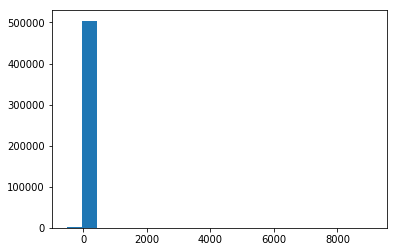

In [9]:
k = round(math.log(total_ns,2) + 1)
R = max(scores_s) - min(scores_s)
A = R/k
print("HISTOGRAMA 2")
plt.hist(scores_s,bins = k, rwidth = A)
plt.show()

## Tabla de comentarios sarcásticos según el intervalo de puntajes:

Intervalo | Cantidad |
 --- | --- |
**[-507, -28.1]** | 804 |
**(-28.1, 450.7]** | 504.231 |
**(450.7, 929.6]** | 274 |
**(929.6, 1408.4]** | 65 |
**(1408.4, 1887.3]** | 26 |
**(1887.3, 2366.1]** | 10 |
**(2366.1, 2845]** | 5 |
**(2845, 3323.8]** | 3 |
**(3323.8, 3802.6]** | 1 |
**(3802.6, 4281.5]** | 0 |
**(4281.5, 4760.4]** | 0 |
**(4760.4, 5239.2]** | 0 |

Consideración: Para analizar los boxplots, se tuvo que eliminar outliers, sino los gráficos se hacían ilegibles.


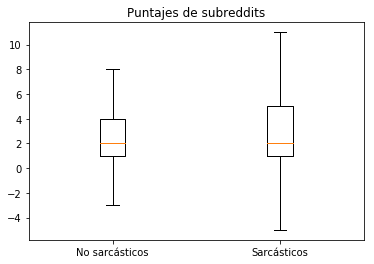

In [10]:
data = [scores_ns, scores_s]
fig7, ax7 = plt.subplots()
print("Consideración: Para analizar los boxplots, se tuvo que eliminar outliers, sino los gráficos se hacían ilegibles.")
ax7.set_title("Puntajes de subreddits")
ax7.boxplot(data, sym = '', labels = ["No sarcásticos", "Sarcásticos"])

plt.show()

## RESPUESTA e) :

> Comparando ambos histogramas, se observa una similitud en un significante sesgo negativo donde el 99% de los datos se encuentra cercana a los intervalos donde existe puntajes negativos no tan bajos y puntajes positivos no tan altos. Para el histograma 1  el 85% de los datos se encuentran en el intervalo [-289,7.8], mientras que para el histograma 2 el 99% de los datos se encuentra en el intervalo (-28.1,450.7]. Analizando los boxplots, nos podemos dar cuenta que en los comentarios sarcásticos existe una mayor dispersión de los datos que el boxplot de los comentarios no sarcásticos. No existe una diferencia significativa entre la mediana de ambos boxplots, esto corrobora que los datos se concentran en ambos casos en torno al mismo intervalo.

## 2. Simulaciones 

Una de las gracias de tener una máquina con alta capacidad de cómputo es el poder realizar simulaciones. Las simulaciones nos permiten recrear experimentos que requieren una gran cantidad de datos, por ejemplo, lanzar un dado 10000 veces y determinar las probabilidades de cada resultado posible.


### 2.1 Lanzamiento de Agujas (30p)

Imagine que tiene un puñado de agujas ($n$ agujas) y las lanza al aire, estas agujas caen aleatoriamente dentro de un espacio de 20x20 unidades (asuma que la aguja puede quedar con una parte afuera y otra adentro si cae en alguno de los bordes/cerca de un borde de este espacio), este espacio tiene líneas horizontales cada 1 unidad en el eje Y, obviando los bordes inferior y superior de este espacio, usted está interesado en determinar la probabilidad de que una aguja atraviese cualquiera de estas líneas horizontales, para ello ha decidido simular este experimento utilizando el centroide de la aguja (posición donde cae) y el ángulo medido respecto a la horizontal que atraviesa el centroide $\alpha$ (ver imagen)

<img src="img/aguja.png" style="float:center;height:100px">

El largo de la aguja es el mismo que la separación entre las lineas horizontales (1 unidad)


Calcule la probabilidad utilizando $n =10,100,1000,10000,100000$ agujas

Puntos bonus por :
* (5) Probar con tamaños distintos del espacio y concluir comparando con los otros casos
* (5) Añadir 1 gráfico por cada $n$ donde se vea el espacio y las agujas después de caer, recuerde hacer un comentario respecto al gráfico, no solo incluirlo.

## - CÓDIGO :

#### Explicación :
> Lsdlald

In [11]:
import random, time, math
#La siguiente funcion simula el experimento
def simular_agujas(repeticiones,espacio):
    random.seed(time.time()) #Una semilla para numeros random
    atrav = list() #Lista de agujas que atraviesan una linea
    n = 1
    flag = False # Falso si el angulo es menor a 90, Verdadero si es mayor a 90
    while n <= repeticiones:
        pos_x = round(random.uniform(0,espacio),1) #Un numero con una cifra decimal, entre 0 y el espacio.
        pos_y = round(random.uniform(0,espacio),1) #Un numero con una cifra decimal, entre 0 y el espacio.
        angulo = random.randint(0,179) #Un angulo de 0 a 179
        if angulo > 90:
            angulo = 180 - angulo #Esta operacion para aprovechar la propiedad del seno: "sen(180-ang) = sen(ang)"
            flag = True
        limsup_y = round((pos_y + (0.5 * math.sin(angulo*math.pi/180))),2) #Calcula el extremo superior de la aguja
        liminf_y = round((pos_y - (0.5 * math.sin(angulo*math.pi/180))),2) #Calcula el extremo inferior de la aguja
        if (pos_y*10)%10 == 0 and angulo == 0:
            if flag:
                atrav.append((n,pos_x,pos_y, 180 - angulo))
                flag = False
            else:
                atrav.append((n,pos_x,pos_y, angulo))
                flag = False
        elif (math.trunc(limsup_y) - math.trunc(liminf_y)) == 1 :
            #Si la diferencia de los enteros de los extremos es uno, significa que lo atraviesa.
            if flag:
                atrav.append((n,pos_x,pos_y, 180 - angulo))
                flag = False
            else:
                atrav.append((n,pos_x,pos_y, angulo))
                flag = False
        n += 1
    return(round((len(atrav)/n)*100,1))

## - SIMULACIÓN :  
### * Espacio 20x20 :

In [12]:
print("La probabilidad con 10 agujas en un espacio de 20x20 es de: ", simular_agujas(10,20))

La probabilidad con 10 agujas en un espacio de 20x20 es de:  63.6


In [13]:
print("La probabilidad con 100 agujas en un espacio de 20x20 es de: ", simular_agujas(100,20))

La probabilidad con 100 agujas en un espacio de 20x20 es de:  64.4


In [14]:
print("La probabilidad con 1000 agujas en un espacio de 20x20 es de: ", simular_agujas(1000,20))

La probabilidad con 1000 agujas en un espacio de 20x20 es de:  60.4


In [15]:
print("La probabilidad con 10000 agujas en un espacio de 20x20 es de: ", simular_agujas(10000,20))

La probabilidad con 10000 agujas en un espacio de 20x20 es de:  61.4


In [16]:
print("La probabilidad con 100000 agujas en un espacio de 20x20 es de: ", simular_agujas(100000,20))

La probabilidad con 100000 agujas en un espacio de 20x20 es de:  61.2


### * Espacio 50x50 :

In [17]:
print("La probabilidad con 10 agujas es en un espacio de 50x50 de: ", simular_agujas(10,50))

La probabilidad con 10 agujas es en un espacio de 50x50 de:  45.5


In [18]:
print("La probabilidad con 100 agujas en un espacio de 50x50 es de: ", simular_agujas(100,50))

La probabilidad con 100 agujas en un espacio de 50x50 es de:  55.4


In [19]:
print("La probabilidad con 1000 agujas en un espacio de 50x50 es de: ", simular_agujas(1000,50))

La probabilidad con 1000 agujas en un espacio de 50x50 es de:  62.2


In [20]:
print("La probabilidad con 10000 agujas en un espacio de 50x50 es de: ", simular_agujas(10000,50))

La probabilidad con 10000 agujas en un espacio de 50x50 es de:  62.5


In [21]:
print("La probabilidad con 100000 agujas en un espacio de 50x50 es de: ", simular_agujas(100000,50))

La probabilidad con 100000 agujas en un espacio de 50x50 es de:  62.6


### * Espacio 100x100 :

In [22]:
print("La probabilidad con 10 agujas en un espacio de 100x100 es de: ", simular_agujas(10,100))

La probabilidad con 10 agujas en un espacio de 100x100 es de:  63.6


In [23]:
print("La probabilidad con 100 agujas en un espacio de 100x100 es de: ", simular_agujas(100,100))

La probabilidad con 100 agujas en un espacio de 100x100 es de:  59.4


In [24]:
print("La probabilidad con 1000 agujas en un espacio de 100x100 es de: ", simular_agujas(1000,100))

La probabilidad con 1000 agujas en un espacio de 100x100 es de:  61.4


In [25]:
print("La probabilidad con 10000 agujas en un espacio de 100x100 es de: ", simular_agujas(10000,100))

La probabilidad con 10000 agujas en un espacio de 100x100 es de:  62.1


In [26]:
print("La probabilidad con 100000 agujas en un espacio de 100x100 es de: ", simular_agujas(100000,100))

La probabilidad con 100000 agujas en un espacio de 100x100 es de:  62.6


## Tabla de las simulaciones :

> Evento A : Una aguja cruza una línea horizontal.

#### Espacio de 20x20 :

nº lanzamientos | P(A) % |
 --- | --- |
**10** | 63.6 |
**100** | 64.4 |
**1000** | 60.4 |
**10000** | 61.4 |
**100000** | 61.2 |

#### Espacio de 50x50 :

nº lanzamientos | P(A) % |
 --- | --- |
**10** | 45.5 |
**100** | 55.4 |
**1000** | 62.2 |
**10000** | 62.5 |
**100000** | 62.6 |

#### Espacio de 100x100 :

nº lanzamientos | P(A) % |
 --- | --- |
**10** | 63.6 |
**100** | 59.4 |
**1000** | 61.4 |
**10000** | 62.1 |
**100000** | 62.6 |

> En conclusión, el cambio de espacio de la simulación no altera la probabilidad de que las agujas traspasen una línea horizontal, es decir, el la probabilidad del evento A es independiente del espacio. Cabe destacar que este experimento llamado aguja de Buffon es un problema para encontrar un valor aproximado de pi. Cuando más aumenta el n de agujas, la probabilidad de que ocurra el evento A,se acerca más al resultado de 2/pi.

### 2.2 Cadenas de Markov (40p)

Las cadenas de markov son un modelo estocástico para describir una secuencia de sucesos donde la probabilidad de ir a un estado siguiente depende solamente del estado actual, esto se puede modelar de la siguiente forma:

$$ S_{n+1} = S_{n}\cdot P$$

Donde $P$ se conoce como matriz de transición y $S_{i}$ las matrices de estado ($S_{0}$ es conocida). Una cadena de markov se dice regular si su matriz de transición es regular, esto quiere decir que alguna potencia de $P$ tiene todas sus entradas positivas (para este caso 0 no es positivo).

Si se tiene una cadena de markov regular, en algún momento de la secuencia se encontrará una matriz de estado tal que:

$$ S_{f} \cdot P = S_{f}$$ 

A esta matriz $S_{f}$ se le conoce como matriz estacionaria.

Si desea profundizar más:
- [MC 1](https://www.youtube.com/watch?v=uvYTGEZQTEs)
- [MC 2](https://www.youtube.com/watch?v=jtHBfLtMq4U)
- [MC 3](https://www.youtube.com/watch?v=P8DuuiINAo4&t)
- [MC 4](https://www.youtube.com/watch?v=31X-M4okAI0)
- [MC 5](https://www.youtube.com/watch?v=-kwnnNSGFMc)


**Enunciado**

Tres compañías de comida rápida están compitiendo por el primer lugar en la supremacía de comida rápida. 

* Si un cliente originalmente es fiel a "Sansafood" tiene un $65\%$ de probabilidad de quedarse fiel a esta, un $20\%$ de cambiarse a "LDS ltda" y un $15\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "LDS ltda" tiene un $40\%$ de probabilidad de quedarse fiel a esta, un $30\%$ de cambiarse a "Sansafood" y un $30\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "Wenzi's" tiene un $70\%$ de probabilidad de quedarse fiel a esta, un $10\%$ de cambiarse a "Sansafood" y un $20\%$ de cambiarse a "LDS ltda".

En un comienzo 200 clientes pertenecen a "Sansafood", 180 a "LDS ltda" y 20 a "Wenzi's".

>a) Identifique la matriz de transición y la matriz de estado inicial

## RESPUESTA a):

#### Matriz transición:

------- | Sansafood | LDS ltda | Wenzi's
 --- | --- | --- | ---
**Sansafood** | 0.65 | 0.2 | 0.15
**LDS ltda** | 0.3 | 0.4 | 0.3
**Wenzi's** | 0.1 | 0.2 | 0.7

#### Matriz inicial:

------- |  |
 --- | --- |
**Sansafood** | 0.5 |
**LDS ltda** | 0.45 |
**Wenzi's** | 0.05 |
    

    

>**O:** b) Haga un diagrama de transición 

## RESPUESTA b):

<img src="img/Diagrama.png" style="float:center;height:600px">

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

## RESPUESTA c) :

> Corresponde a un caso de markov regular, pues los números de las matríces son mayores a 0. Si hubiese algún número que fuese menor o igual a 0, ya no sería un caso de markov regular.

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

## RESPUESTA d):

> Tiene matriz estacionaria, pues el problema corresponde a un caso de markov.

## - CÓDIGO d):

In [27]:
import numpy as np
import pandas as pd

# Se utiliza la fórmula descrita en el enunciado para encontrar la matriz estacionaria
# Se multiplica la matriz_transicion con la matriz_nueva
# hasta que la matriz_anterior sea igual a la nueva_matriz.

def matriz_estacionaria(matriz_transicion,matriz_estado_inicial) :
    Encontrada = False
    matriz_anterior = matriz_estado_inicial
    while not Encontrada:
        nueva_matriz = np.dot(matriz_anterior,matriz_transicion)
        if (matriz_anterior == nueva_matriz).all():
            Encontrada = True
        else:
            matriz_anterior = nueva_matriz
    return matriz_anterior

matriz_transicion = np.array([[0.65,0.2,0.15],[0.3,0.4,0.3],[0.1,0.2,0.7]])
matriz_estado_inicial = np.array([0.5,0.45,0.05])
print ("Resultado del código:\n")
print(matriz_estacionaria(matriz_transicion,matriz_estado_inicial))

Resultado del código:

[0.33333333 0.25       0.41666667]


#### La matriz estacionaria es la siguiente:

------- |  |
 --- | --- |
**Sansafood** | 0.33333333 |
**LDS ltda** | 0.25 |
**Wenzi's** | 0.41666667 |

>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

## CÓDIGO e):

In [28]:
matriz_inicial = np.array([[200,180,20]])

def sansafood(matriz_inicial):
    personas = {"Sansafood":0,"LDS ltda":0,"Wenzis":0}
    for i in range(matriz_inicial[0][0]):
        x = np.random.choice(["Sansafood","LDS ltda","Wenzis"], p = [0.65,0.2,0.15])
        personas[x] += 1
    return personas
def lds_ltda(matriz_inicial):
    personas = {"Sansafood":0,"LDS ltda":0,"Wenzis":0}
    for i in range(matriz_inicial[0][1]):
        x = np.random.choice(["Sansafood","LDS ltda","Wenzis"], p = [0.3,0.4,0.3])
        personas[x] += 1
    return personas
def wenzis(matriz_inicial):
    personas = {"Sansafood":0,"LDS ltda":0,"Wenzis":0}
    for i in range(matriz_inicial[0][2]):
        x = np.random.choice(["Sansafood","LDS ltda","Wenzis"], p = [0.1,0.2,0.7])
        personas[x] += 1
    return personas
for i in range(500):
    columna1 = sansafood(matriz_inicial)
    columna2 = lds_ltda(matriz_inicial)
    columna3 = wenzis(matriz_inicial)
    matriz_inicial[0][0] = columna1["Sansafood"] + columna2["Sansafood"] + columna3["Sansafood"]
    matriz_inicial[0][1] = columna1["LDS ltda"] + columna2["LDS ltda"] + columna3["LDS ltda"]
    matriz_inicial[0][2] = columna1["Wenzis"] + columna2["Wenzis"] + columna3["Wenzis"]
print(matriz_inicial/400)

[[0.3225 0.285  0.3925]]


## RESPUESTA e) :

> Se realiza una simulación con 500 iteraciones, donde cada iteración puede representar un día. La **matriz** encontrada es la siguiente:

------- | Probabilidades |
 --- | --- |
**Sansafood** | 0.35 |
**LDS ltda** | 0.2275 |
**Wenzi's** | 0.4225 |

> En comparación con la matriz d), se asemejan bastante, entonces se puede decir que en la realidad, después de un gran tiempo, se aproxima a una cantidad **constante de clientes** en cada local.
> Los clientes finales en cada local de esta simulación serán :

------- | Clientes |
 --- | --- |
**Sansafood** | 140 |
**LDS ltda** | 91 |
**Wenzi's** | 169 |

> Podemos concluir que el local con mayor cantidad de clientes despuès de 500 dìas será **Wenzi's** con 169 clientes.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el  día 31 de Marzo a las 23hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.2
+ La versión de Python que se usará para revisar es 3.6.8
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)